# Pandas 数据可视化
Pandas 生态系统 http://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-visualization  
可视化参考： http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#使绘图内嵌到notebook中
%matplotlib inline

Series和DataFrame的plot方法只是简单的对plt.plot方法的包装  
Pandas的Series跟DataFrame类似，所以只列举DataFrame的例子

#### plot函数的kind关键字可以设置如下几种图形.   
‘bar’ or ‘barh’：棒状图  
‘hist’ for histogram：直方图  
‘box’ for boxplot：箱图  
‘kde’ or 'density'：密度图  
‘area’：区域图  
‘scatter’：散点图  
‘hexbin’： hexagonal bin（样子像六边形格子图）  
‘pie’：饼图  
‘line’：曲线图

## 曲线图

In [3]:
df = pd.DataFrame(np.random.randn(1000,2), columns=['B', 'C']\
            , index=pd.date_range('1/1/2000', periods=1000))
df['A'] = pd.Series(list(range(len(df)))).values
df.head()

,B,C,A
2000-01-01,-0.820535,-0.526976,0
2000-01-02,-0.521180,0.475226,1
2000-01-03,-0.105868,0.173597,2
2000-01-04,-1.267665,-1.528565,3
2000-01-05,1.568318,-0.320160,4


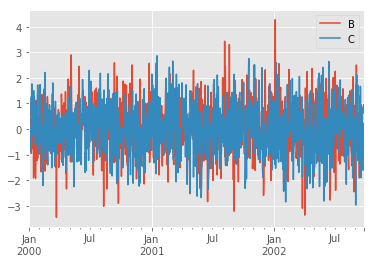

In [3]:
df.plot(y=['B', 'C'])

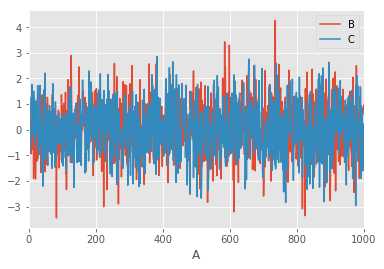

In [4]:
df.plot(x=['A'],y=['B', 'C'])

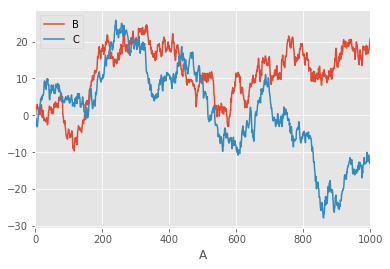

In [5]:
df2 = df.cumsum()
df2['A'] = pd.Series(list(range(len(df2)))).values
df2.plot(x=['A'],y=['B', 'C'])

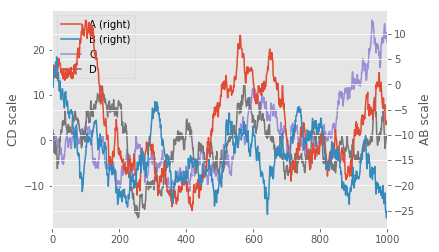

In [6]:
df3 = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B', 'C', 'D'])
df3 = df3.cumsum()
ax = df3.plot(secondary_y=['A', 'B'], x_compat=True, mark_right=True)
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

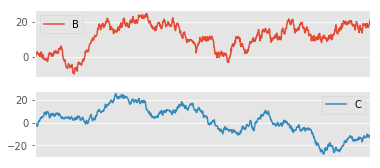

In [7]:
ax_array = df2.plot(x=['A'],y=['B', 'C'], layout=(-1,1), \
                    figsize=(6,3), subplots=True, x_compat=True)
ax_array[0,0].get_xaxis().set_visible(False)
ax_array[1,0].get_xaxis().set_visible(False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C58D9E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8180F0>], dtype=object)

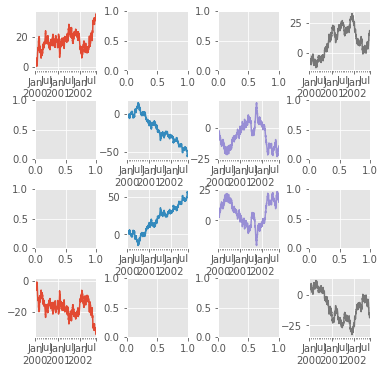

In [8]:
df4 = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD')\
                   , index=pd.date_range('1/1/2000', periods=1000))
df4 = df4.cumsum()
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df4.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False)
(-df4).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)

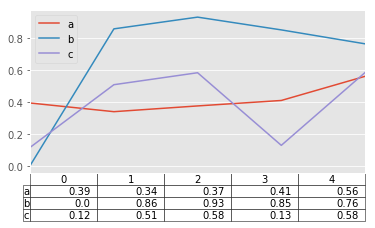

In [9]:
fig, ax = plt.subplots(1, 1)
df4 = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])
ax.get_xaxis().set_visible(False)   # Hide Ticks
df4.plot(table=np.round(df4.T, 2), figsize=(6,3), ax=ax)

## 柱状图

In [10]:
df3 = pd.DataFrame(np.random.rand(3, 4), \
            columns=['a', 'b', 'c', 'd'])
df3

,a,b,c,d
0,0.428499,0.747382,0.071198,0.226299
1,0.801149,0.418992,0.663303,0.785019
2,0.681583,0.338990,0.691158,0.838161


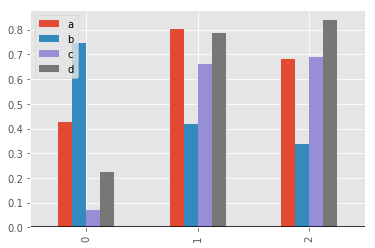

In [11]:
# figure创建一个绘图对象，并且使它成为当前的绘图对象。
plt.figure()
df3.plot(kind='bar')
# 0是黑线在y坐标的位置，color指定线的颜色
plt.axhline(0, color='k')

### 堆叠起来可以看出部分占整体的比例

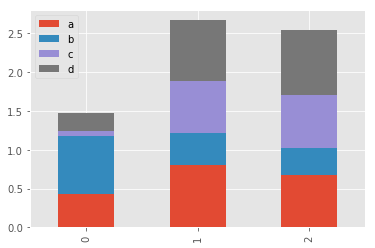

In [12]:
df3.plot(kind='bar', stacked=True)

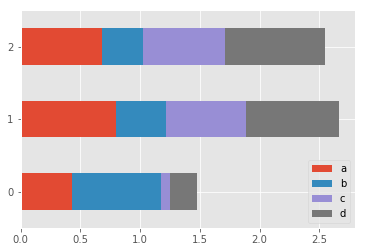

In [13]:
df3.plot(kind = 'barh', stacked=True)

#### 绘制柱状图的时候，误差也可以一起显示

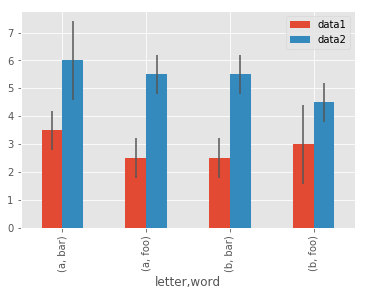

In [14]:
# Generate the data
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],\
          ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], \
                                names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], \
                    'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)

# Group by index labels and take the means and 
# standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
errors = gp3.std()
means.plot.bar(yerr=errors)

## 直方图

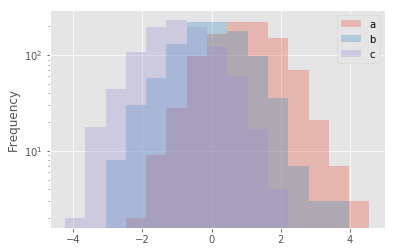

In [15]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, \
                    'b': np.random.randn(1000), \
                    'c': np.random.randn(1000) - 1},\
                     columns=['a', 'b', 'c'])
# bins可以设置统计区间数量，alpha可以设置透明度
# orientation 方向参数,水平'vertical',垂直'horizontal'
# cumulative 累加参数, True累加，False不累加
# legend为True 可以看到类标，False则隐藏类标
# logy为True，y的值用指数表示，False择用正常值表示。
df4.plot(kind='hist',orientation='vertical', cumulative=False, \
         bins=15, alpha=0.3, legend=True, logy=True)

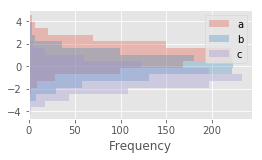

In [16]:
df4.plot(kind='hist',orientation='horizontal', figsize=(4,2), \
         cumulative=False, bins=15, alpha=0.3)

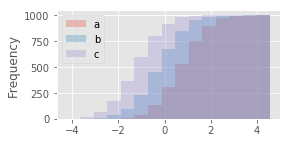

In [17]:
df4.plot(kind='hist',orientation='vertical', figsize=(4,2), \
         cumulative=True, bins=15, alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F1BF390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F82B780>]], dtype=object)

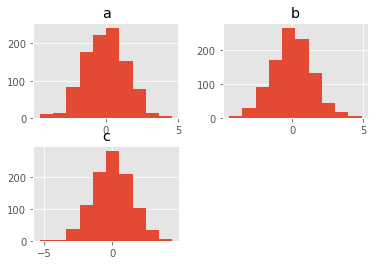

In [18]:
print 'diff是求当前数减去上一个数得到的值'
print '绘制差值分布直方图'
print '直接使用hist函数则会对每个字段单独绘制一个直方图'
df4.diff().hist()

by等于一个与索引等长度的列表或数组，
根据将相同索引的值归为数组的值指定的组中


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FB20358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E788898>]], dtype=object)

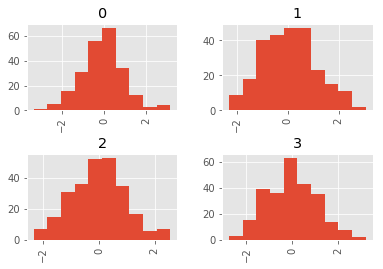

In [19]:
data = pd.Series(np.random.randn(1000))
print 'by等于一个与索引等长度的列表或数组，'
print '根据将相同索引的值归为数组的值指定的组中'
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

## 箱图

箱图可大致看出数据的分布，理解的内容有异常值，  
上限，下限，中位数，上四分位线，下四分位线。

小圆点表示异常值，上黑色线是上限，下黑线是下限
箱中的一条线是中位数，箱子上边缘是上四分位线
，下边缘是下四分位线


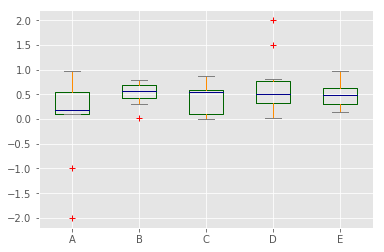

In [20]:
print '小圆点表示异常值，上黑色线是上限，下黑线是下限'
print '箱中的一条线是中位数，箱子上边缘是上四分位线'
print '，下边缘是下四分位线'
df = pd.DataFrame(np.random.rand(10, 5), \
                  columns=['A', 'B', 'C', 'D', 'E'])
df.ix[2:3, 'A'] = [-1, -2]
df.ix[2:3, 'D'] = [1.5, 2]
color = dict(boxes='DarkGreen', whiskers='DarkOrange',\
            medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

vert为False时水平方向绘制
positions指定各个箱图的位置


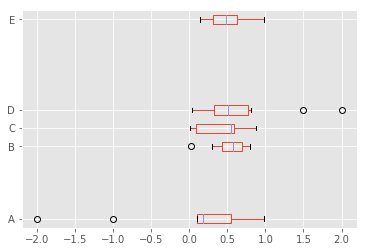

In [21]:
print 'vert为False时水平方向绘制'
print 'positions指定各个箱图的位置'
df.plot.box(vert=False, positions=[1, 5, 6, 7, 12])

根据字段值将其余字段的值分组，并绘制箱子图


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000110DFDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001160D470>]], dtype=object)

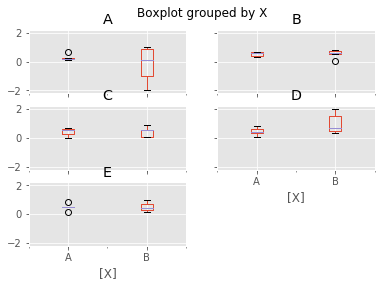

In [22]:
print '根据字段值将其余字段的值分组，并绘制箱子图'
df['X'] = pd.Series(['A','A','B','B','B'\
                     ,'A','A','A','B','B'])
df.boxplot(by='X')

### 面积图（Area）
与简单的折线图，这个的效果图堆叠的柱状图与柱状图的目的类似。  
堆叠起来可以看出部分与整体的比例

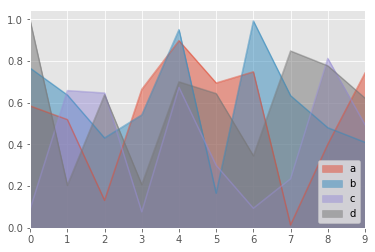

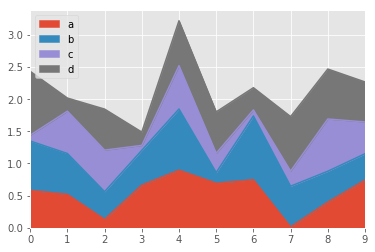

In [23]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area(stacked=False)
df.plot.area(stacked=True)

## 散点图

**参数<font color=red size=5>c</font>可以设置一个字段名字，根据这个字段的值给点不同的颜色**  
**参数<font color=red size=5>color</font>是颜色，给定一个值表示设置一个个颜色，一个列表表示对每个点设置不同的颜色**  
**参数<font color=red size=5>s</font>是点的大小，给定一个值表示设置一个大小，一个列表表示对每个点设置不同的大小**

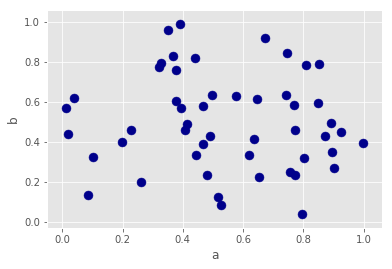

In [24]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b', color='DarkBlue' , s = 80);

#### 分别设置颜色，共用一个axis容器

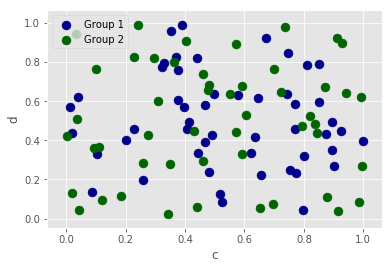

In [25]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue',\
                     label='Group 1', s = 80);
df.plot.scatter(x='c', y='d', color='DarkGreen',\
                label='Group 2', s = 80, ax=ax);

## Hexagonal Bin
用于高密度散点图，当点在某个位置密度很大时候很难看出分布，  
改图的颜色可以显示该区域点的密集程度

参数gridsize设置设置水平方向的有多少个六方格  
C是一个字段可设置被统计的数据  
reduce_C_function设置一个函数将每个格子中数据映射为一个值作为上色参考  
C和reduce_C_function默认情况下是计算每个（x，y）点周围的计数直方图

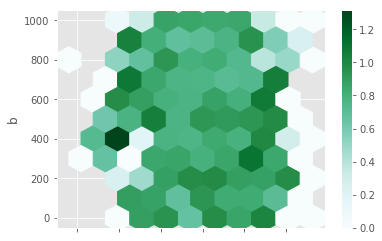

In [26]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.std,\
               gridsize=10)

## 饼图
缺失值会认为是0，值不能为负数，如果为分数，则认为是圆形区域的百分比。如果存在值大于1，  
则会自动计算百分比。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012829588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001288E978>], dtype=object)

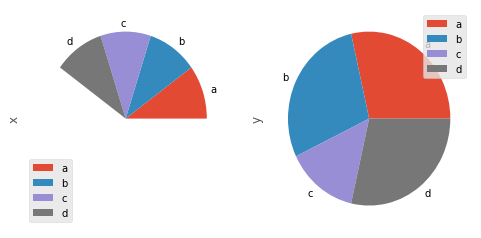

In [27]:
df = pd.DataFrame([[0.1,4], [0.1,4], [0.1,2], [0.1,4]], \
                  index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

## 散布图(scatter matrix)
可以用来分析特征之间的相关性，对角线可以是密度图（不仅限）可以用来看特征值的分布。  
如果根据类别标上不同的颜色，可以分析两两特征与类别之间的关系。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000137190B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000123B4278>]], dtype=object)

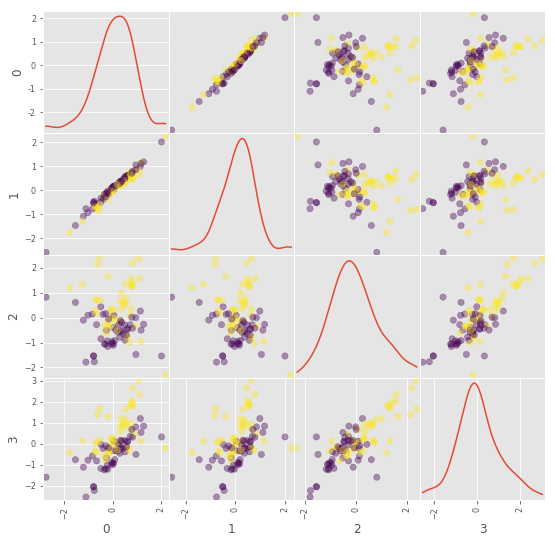

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.make_classification(
    n_samples=100, n_features=4, n_redundant=2,
    n_classes=2, hypercube=False)

df = pd.DataFrame(X)
df['class'] = y
pd.scatter_matrix(df.iloc[:,:-1], figsize=(9, 9), \
                  diagonal='kde', marker='o', s=40, alpha=.4, c=df['class'])

## 调和曲线图（andrews curves）
调和曲线图是D.F.Andrews1972年提出的三角多项式作图  
法，所以又称为三角多项式图。其思想是把高维空间中的一  
个样品点对应于二维平面上的一条曲线。拧在一起的可能是  
一个类别的。

调和曲线图的思想和傅立叶变换十分相似，是根据三角变换方法将 p 维空间的点映射到二维平面上的曲线上。  
假设$X$是p维数据，$X = (X_{1}, X_{2}, ..., X_{p})^{'}$  
$X^T$对应的曲线是：  
$f_X(t) = \frac{X_{1}}{\sqrt{2}}+X_{2}sin(t)+X_{3}cos(t)+X_{4}sin(2t)+X_{5}cos(2t)+...$共p项相加

Iris也称鸢尾花卉数据集


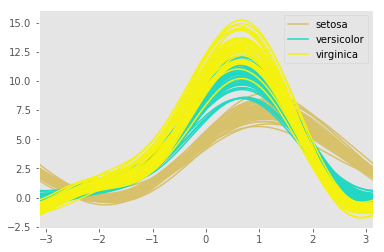

In [29]:
from pandas.tools.plotting import andrews_curves
print 'Iris也称鸢尾花卉数据集'
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['class'] = data.target
iris['class'] = iris['class'].apply(lambda x: data.target_names[x])
andrews_curves(iris,'class')

## Parallel Coordinates

轮廓图的思想非常简单、直观，它是在横坐标上取 p 个点，  
依次表示各个指标(即变量)；横坐标上则对应各个指标的值  
(或者经过标准化变换后的值)，然后将每一组数据对应的点  
依次连接即可。拧在一起的可能是同一类。

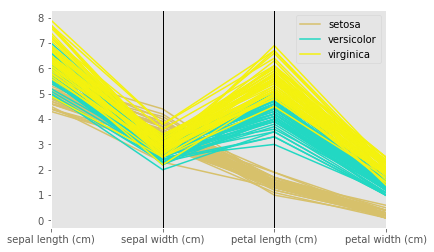

In [30]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'class')

## lag plot
Lag plots are used to check if a data set or time series is random.   
Random data should not exhibit any structure in the lag plot.  
Non-random structure implies that the underlying data are not random

In [31]:
from pandas.tools.plotting import lag_plot

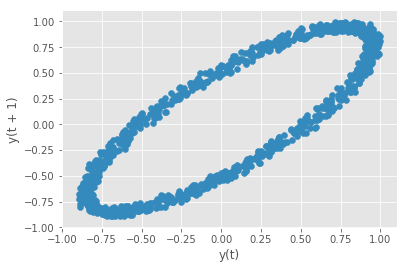

In [32]:
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * \
                 np.cos(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

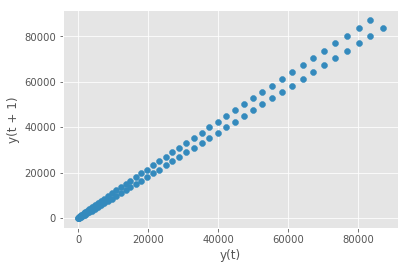

In [33]:
data = pd.Series(0.1 * np.random.rand(100) + 0.9 * \
                 (np.linspace(-99 * np.pi, 99 * np.pi, num=100))**2)
lag_plot(data)

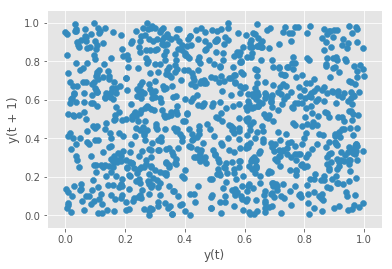

In [34]:
data = pd.Series(np.random.rand(1000))
lag_plot(data)

## 自相关图（autocorrelation）
自相关图常被用来检查时间序列的随机性，通过不同的时间滞后来计算自相关性。  
如果时间序列是随机的，那么任何的自相关是接近于0的或者所有的时间之后分离  
（all time-lag separations）。如果时间序列是非随机的，那么至少有一  
个自相关是显著不为0的。水平线分别表示99%和95%的置信带，虚线是99%置信带。

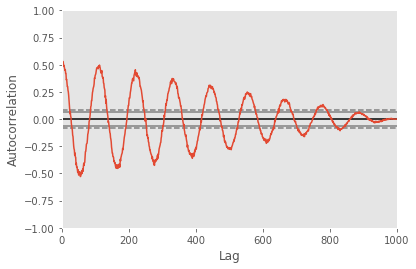

In [35]:
from pandas.tools.plotting import autocorrelation_plot
data = pd.Series(0.7 * np.random.rand(1000) +   \
                 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

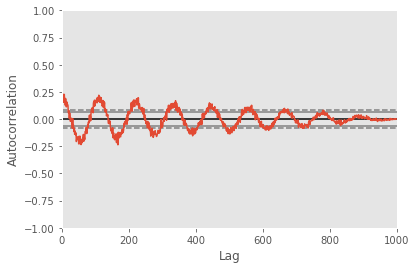

In [36]:
from pandas.tools.plotting import autocorrelation_plot
data = pd.Series(0.75 * np.random.rand(1000) +   \
                 0.15 * np.sin(np.linspace(-9 * np.pi, \
                 9 * np.pi, num=1000)))
autocorrelation_plot(data)

## Bootstrap
Bootstrap是用来直观地评估统计的不确定性，如平均，中位数，中列数字等。

11世纪波斯知识界巨匠比鲁尼是集中量数已知最早的使用者之一。  
他尝试测量了古城伽兹尼的经度。那个时代的人们在拿到一组测量  
数据之后，会去掉两头之间的数据，取最大值和最小值中间的算术  
平均数。我们今天把这个数称为中列数(midrange)。

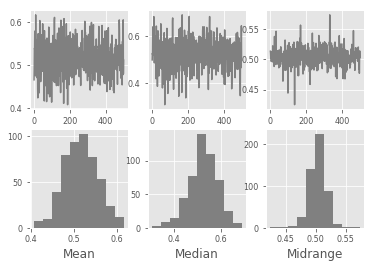

In [37]:
from pandas.tools.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
_ = bootstrap_plot(data, size=50, samples=500, color='grey')

## Radviz
Radviz是一种可视化的多变量数据的方法，它是基于一个简单的弹簧张力最小化算法。  
每个点假设与各个属性点连接，根据属性值的大小（需要先做归一化处理）设置不同的  
张力，点所在的位置是张力平衡点。可也看出属性在不同类别的值的大小。

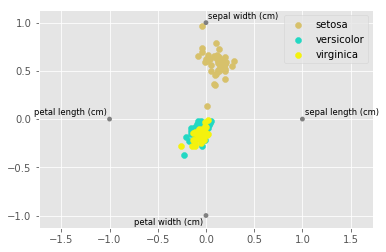

In [38]:
from pandas.tools.plotting import radviz
radviz(iris, 'class')

## Matplotlib
参考链接  
1、http://matplotlib.org/index.html  
2、http://www.cnblogs.com/vamei/archive/2013/01/30/2879700.html

## 雷达图

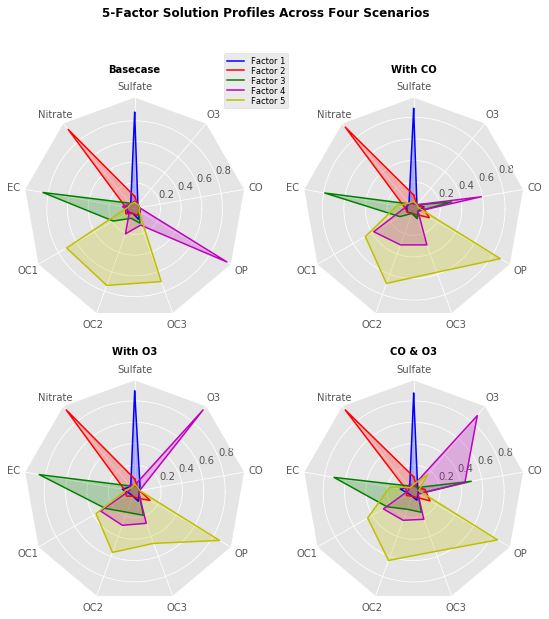

In [39]:
if __name__ == '__main__':
    from radar_chart import *
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

## 地理数据可视化
basemap包安装
安装命令： Anaconda2路径\Scripts>conda install Basemap  
如果配置了环境变量，则用命令 conda install Basemap

In [40]:
# 第一列是城市名，第二列是人口，第三第四列为纬度和经度，最后一列为所在国家。
columns = [ 'city_name', 'population', 'latitude', 'longitude', 'country_name']
print '经纬负数表示南或者西'
data = [
['Shanghai', 23019148,  31.23, 121.47 , 'China'],
['Mumbai'  , 12478447,  18.96, 72.82  , 'India'],
['Karachi' , 13050000,  24.86, 67.0   , 'Pakistan'],
['Delhi'   , 16314838,  28.67, 77.21  , 'India'],
['Manila'  , 11855975,  14.62, 120.97 , 'Philippines'],
['Seoul'   , 23616000,  37.56, 126.99 , 'Korea(South)'],
['Jakarta' , 28019545, - 6.18, 106.83 , 'Indonesia'],
['Tokyo'   , 35682460,  35.67, 139.77 , 'Japan'],
['Peking'  , 19612368,  39.91, 116.39 , 'China']]
df = pd.DataFrame(data, columns=columns)
df

经纬负数表示南或者西


,city_name,population,latitude,longitude,country_name
0,Shanghai,23019148,31.23,121.47,China
1,Mumbai,12478447,18.96,72.82,India
2,Karachi,13050000,24.86,67.00,Pakistan
3,Delhi,16314838,28.67,77.21,India
4,Manila,11855975,14.62,120.97,Philippines
5,Seoul,23616000,37.56,126.99,Korea(South)
6,Jakarta,28019545,-6.18,106.83,Indonesia
7,Tokyo,35682460,35.67,139.77,Japan
8,Peking,19612368,39.91,116.39,China


D:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
D:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
D:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
D:\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


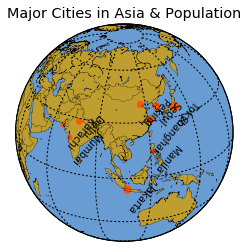

In [42]:
from mpl_toolkits.basemap import Basemap
#============================================
#参考自:http://www.cnblogs.com/vamei/archive/2012/09/16/2687954.html
#============================================
# set up map projection with
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=df['latitude'].mean(),\
              lon_0=df['longitude'].mean(),resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='#689CD2')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# Fill continent wit a different color
map.fillcontinents(color='#BF9E30',lake_color='#689CD2',zorder=0)
# compute native map projection coordinates of lat/lon grid.
x, y = map(list(df['longitude']), list(df['latitude']))
max_pop = max(df['population'])
# Plot each city in a loop.
# Set some parameters
size_factor = 80.0
y_offset    = 15.0
rotation    = 230
for i,j,k,name in zip(x,y,df['population'],df['city_name']):
    size = size_factor*k/max_pop
    cs = map.scatter(i,j,s=size,marker='o',color='#FF5600')
    plt.text(i,j+y_offset,name,rotation=rotation,fontsize=10)

plt.title('Major Cities in Asia & Population')
plt.show()